<h1><center> HR Analytics </center></h1>
<div style="text-align: right">-   Ayanava Dutta </div>


<h2>Problem Statement:</h2>

***
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problems your client is facing is around identifying the right people for promotion (only for manager positions and below) and preparing them in time. -Currently the process, they are following is:
- They first identify a set of employees based on recommendations/ past performance
- Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
- At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For the above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, the company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 
***


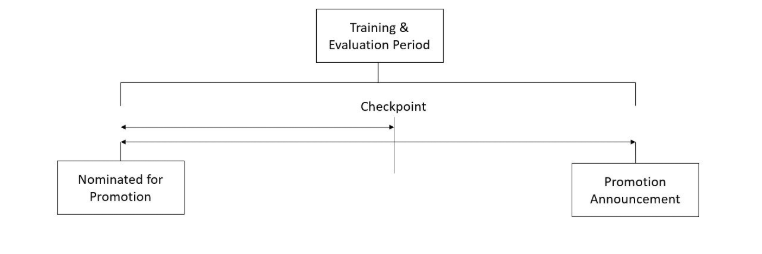
***

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

___

<h3><center> Dataset Description:</center></h3>


| Variable | Definition | 
| :- | :- | 
| **employee_id** | Unique ID for employee 
| **department** | Department of employee 
| **region** | Region of employment (unordered) 
| **education** | Education Level 
| **gender** | Gender of Employee 
| **recruitment_channel** | Channel of recruitment for employee
| **no_of_trainings** | no. of other trainings completed in previous year on soft skills, technical skills etc. 
| **age** | Age of Employee 
| **previous_year_rating** | Employee Rating for the previous year
| **length_of_service** | Length of service in years
| **KPIs_met >80%** | if Percent of KPIs(Key performance Indicators) >80% then 1 else 0 
| **awards_won?** | if awards won during previous year then 1 else 0
| **avg_training_score** | Average score in current training evaluations 
| **is_promoted** | (Target) Recommended for promotion 




___

<h1>Outline:</h1>


1.**[Data Pre-processing](#prep)**
- [Over View of the Dataset](#dims)
- [Mixed variable seperation](#mix)
- [Splitting The Data](#tts)
- [Handling Missing values](#miss)
- [Encoding](#enc)
- [Duplicate Columns](#dupp)
- [Constant and Quasi-Constant features](#qcfp)
<br><br>

2.**[Exploratory Data Analysis](#eda)**
- [Checking Balance of the target Column](#bal)
- [Univariate Analysis](#uva)
    - _[Box Plots](#bxplt)_
    - _[Distribution Plots](#distplt)_
    - _[QQ Plots](#qqplt)_
    - _[Count Plots](#countplt)_
    - _[Pie Chart](#pieplt)_
    - _[PDF & CDF Plots](#pdfcdf)_
- [Bivariate Analysis](#bva)
    - _[Count Plots](#bvcountplt)_
    - _[Line Plots](#bvlineplt)_
    - _[Scatter Plots](#bvscttrplt)_
- [Multivariate Analysis](#mva)     
    - _[Pair Plots](#mvpairplt)_
    - _[Correlation HeatMap](#mvheatplt)_ 
    <br><br>
    
    
3.**[Resampleing](#res)**
<br><br>

4.**[Feature Engineering](#fe)**
<br><br>

5.**[Feature Selection](#fs)**
<br><br>

6.**[Hyperparameter Tuning](#ht)**
<br><br>

7.**[Model Building and Evaluation](#mb)**
- [Random Forest](#rf)
- [Decision Tree](#dt)
- [Gradient Boost Classifier](#gb)
- [XGBoost](#xg)
- [Using LightGBM](#lgbm)
<br><br>

7.**[Summary](#s)**

_____

### Importing the required libraries

In [1]:
#importing libraries 

import numpy as np #for numeric computation
import pandas as pd #for dealing with files using dataframes
pd.options.display.max_columns = 500
import seaborn as sns #Vizualization
sns.set_style('darkgrid')
import matplotlib.pyplot as plt #Vizualization
from sklearn.model_selection import train_test_split #Data splitting
from sklearn.feature_selection import VarianceThreshold #filtering constant data
from scipy.stats import skew,kurtosis
import scipy.stats as stats
import pylab
import warnings #
warnings.filterwarnings('ignore')

def super_star(*n):
    m=n[0]
    if len(n)>1:
        rep=n[1]
        for i in (0,rep):
            print("*"*m,"\n")
            
    else:
        print("*"*m)  


**Reading the Test and Train Data into** **`DataFrame`**. 

In [2]:
train = pd.read_csv("train_LZdllcl.csv") 
test = pd.read_csv("test_2umaH9m.csv") 


In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


___
<h3> Data Preprocessing</h3>
<a id="prep"></a>

Preparing the data to bring it to such a state so that the features of the data can be easily interpreted by the algorithm

***

**Overview of the data**
<a id="dims"></a>

In [5]:
#to know about the dimentions of the dataset
print("Shape of Train Data: "+str(train.shape)+"\nShape of Test Data: "+str(test.shape))

Shape of Train Data: (54808, 14)
Shape of Test Data: (23490, 13)


In [6]:
#Insights about Each Column

#-------------PRINTING THE COLUMN NAMES------------------------------------------------------------
super_star(100,2)
print("Column Names:")
super_star(12)
print( "\n",*train.columns.values,sep='\n')

#------------Applying .info to get an overview of the data-----------------------------------------
super_star(100,2)
print("Overview of the Train data: ")
super_star(27)
print("\n",train.info())# we see some values are missing from the column education and previous_year_rating


#-------------CHECKING THE NUMBER OF MISSING VALUES-----------------------------------------------
super_star(100,2)
print("Number of Missing values in each Columns:")
super_star(40)
print("\n", train.isnull().sum()) #number of null values in each column


super_star(100,2)
print("Percentage of Missing values in each Columns:")
super_star(40)
print("\n",(train.isnull().mean()*100))#percentage of null values in each column
super_star(100)

**************************************************************************************************** 

**************************************************************************************************** 

Column Names:
************


employee_id
department
region
education
gender
recruitment_channel
no_of_trainings
age
previous_year_rating
length_of_service
KPIs_met >80%
awards_won?
avg_training_score
is_promoted
**************************************************************************************************** 

**************************************************************************************************** 

Overview of the Train data: 
***************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   r

___
### Observations:
- We can see that the train set has got  2409 misssing values in the `education` and 4124 misssing values in the `previous_year_rating` columns respectively.Which amounts to 4.3% of missing data in `education` column and 7.5% of missing data in the `previous_year_rating` column.
- We have 5 categorical columns in our dataset (`department, region, education, gender, recruitment_channel`).<br><br>

#### Inference:
1. Missing data in `previous_year_rating` column might be the employees who haven't yet completed 1 year into the company.<br>
2. Missing data in `education` column might be due to human error.
___

In [7]:
#Insights about the values in the data

super_star(100)
print("Getting an overview about the categorical features:\n")
print(train.describe(include = 'object').transpose())#to get an overview of the categorical features
super_star(100,2)
print()
super_star(100)
print("Getting an overview about the non categorical features:")
train.describe().transpose()#to get the overview of the non categorical features

****************************************************************************************************
Getting an overview about the categorical features:

                     count unique                top   freq
department           54808      9  Sales & Marketing  16840
region               54808     34           region_2  12343
education            52399      3         Bachelor's  36669
gender               54808      2                  m  38496
recruitment_channel  54808      3              other  30446
**************************************************************************************************** 

**************************************************************************************************** 


****************************************************************************************************
Getting an overview about the non categorical features:


,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


___

<h3> Observations: </h3><br>
From the trends in the train data it can be derive that:

- There are a total of 9 departments in the company with most of the employees working under the Sales & Marketing Department.
- The company operates across 34 regions with most employment in region2.
- Majority of the employees working under this company hold a Bachelor's degree in education.
- Currently the company is operating with more number of Male employees.

#### Inference:
The possibility of having missing values in  __`previous_year_rating`__ column due to the employees who haven't yet completed 1 year into the company can be ruled out as we see the minimum value of __`length_of_service`__ is 1 ,and it has no missing value, so it can be said that each employee has completed minimum of 1 year with the company, but still has no __`previous_year_rating`__ , therefore this can be due to human error.
___

In [8]:
#---------VALUES UNDER THE TRAIN DATA-----------------
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


___
### Observation :
On looking at the values of each columns we see that the `__region__` column consist of Mixed Variables.

#### Inference:
We can seperate the values from the string, as all numeric values have the prefix 'region_' added to it we can replace it with "" and convert it to int.


___

### Mixed variable seperation
<a id="mix"></a>

In [9]:
#Mixed variable sep
train['region'] = train['region'].str.replace('region_','')
train = train.astype({"region": int})

#train['region'].value_counts()[:5]


test['region'] = test['region'].str.replace('region_','')
test = test.astype({"region": int})
#train.info()
test.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


Here we have made the **`region`** col a non categorical feature<br>
<br>

____
### Separating feature set from target variable

In [10]:
#Splitting data into Feature set and Target 

#--------------Copying data from 'train' to 'X' except the target column 'is_promoted' to make the feature set------------------
X = train.iloc[: , :13]   #feature set
y = train['is_promoted']  # Target Column

print("Shape of X(Feature set): "+str(X.shape)+"\nShape of y(Target Column): "+str(y.shape))
X.head()

Shape of X(Feature set): (54808, 13)
Shape of y(Target Column): (54808,)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73


___
### TRAIN TEST SPLIT Operation
<a id="tts"></a>
Doing it at the beginning to avoid chances of overfitting.<br>

Making Train, Test and Validation sets in the ratio 70,15,15 respectively
___

In [11]:
#-------------------Splitting the data randomly creating test and train set------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

#--------Creating a validation set by splitting X_train y_train -----------------------------------
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1) 

___
### Handling Missing values:
<a id="miss"></a>
- filling missing values of  __`previous_year_rating`__ with _mean_ based on __`KPIs_met >80%`__ as these features are correlated
- filling missing values of  __`education`__ with _median_ based on __`department`__ as this is a categorical variable, so replacing the missing value here with the most frequent value w.r.t department.

Applying on __`X_train`, `X_val`, `X_test`__ & __`test`__ sets
___

In [12]:
#NULL IMPUTAION
#------------------------Replacing missing values for X_train------------------------------------------------
#X_train.groupby("department")["education"].value_counts()
X_train['previous_year_rating'] = X_train.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(round(x.mean())))
X_train["education"] =X_train["education"].astype('object')
X_train['education'] = X_train.groupby(["department"])["education"].apply(lambda x: x.fillna(x.value_counts().index[0]))
print("Missing values in X_train--->\n\n ", X_train.isnull().sum())


#------------------------Replacing missing values for X_val------------------------------------------------
X_val['previous_year_rating'] = X_val.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(round(x.mean())))
X_val["education"] =X_val["education"].astype('object')
X_val['education'] = X_val.groupby(["department"])["education"].apply(lambda x: x.fillna(x.value_counts().index[0]))
super_star(30,2)
print("Missing values in X_val--->\n\n ", X_val.isnull().sum())


#------------------------Replacing missing values for X_test------------------------------------------------
X_test['previous_year_rating'] = X_test.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(round(x.mean())))
X_test["education"] =X_test["education"].astype('object')
X_test['education'] = X_test.groupby(["department"])["education"].apply(lambda x: x.fillna(x.value_counts().index[0]))
super_star(30,2)
print("Missing values in X_test--->\n\n ", X_test.isnull().sum())


#------------------------Replacing missing values for test------------------------------------------------
test['previous_year_rating'] = test.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(round(x.mean())))
test["education"] =test["education"].astype('object')
test['education'] = test.groupby(["department"])["education"].apply(lambda x: x.fillna(x.value_counts().index[0]))
super_star(30,2)
print("Missing values in test--->\n\n ", test.isnull().sum())
super_star(30)

Missing values in X_train--->

  employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64
****************************** 

****************************** 

Missing values in X_val--->

  employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64
****************************** 

****************************** 

Missing values in X_test--->

  employee_id             0
department              0
region            

### Observations:
There are no missing values in the data, all that were present are imputed

___
### ENCODING 
<a id="enc"></a>
- From the previous observations we noticed that gender column has categorical values, so encoding them __`1-Male`__ and __`0-Female`__ which may help us during model building and eda to know about the trends in the data.

___

In [13]:
 #creating a dictionary to change the value in the gender col '1 for m' and '0 for f'
gen_dict = {'m': 1, 'f': 0}
#-------Mapping the values to all sets--------------
#-------------------X_train------------------------
X_train['gender'] = X_train['gender'].map(gen_dict) 

#-------------------X_test------------------------
X_test['gender'] = X_test['gender'].map(gen_dict)

#-------------------X_val------------------------
X_val['gender'] = X_val['gender'].map(gen_dict)

#-------------------test------------------------
test['gender'] = test['gender'].map(gen_dict)

#X_train.head()
#X_test.head()
#X_val.head()
#test.head()

___
### Duplicate Columns
<a id="dupp"></a>
Checking the dataset for duplicate columns, if any will drop them from the dataset
___

In [14]:
#-------------------Function to get all duplicated column labels-------------------------------
def getDuplicateColumns(df):
    dup_col = set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                dup_col.add(df.columns.values[y])
 
    return list(dup_col)


#--------------------------Function to print the list of duplicate columns---------------------
def printlist(col_name):
    for count,ele in enumerate(col_name,1):
        print(count,'. ',ele)
#-----------------------------------------------------------------------------------------------


dup_col = getDuplicateColumns(X_train)

#printing duplicate columns if any
print("-----",len(dup_col),"Duplicate Columns-----\n")
printlist(dup_col) 
print("\n------------------------------")
print('Current Shape of the DataFrame--->', X_train.shape)

----- 0 Duplicate Columns-----


------------------------------
Current Shape of the DataFrame---> (39598, 13)


### Observations:
We have no **Duplicate Columns** in our dataset 


___
### Checking for Constant and Quasi-Constant features
<a id="qcfp"></a>

* __Why I have done this?__<br>
*__Constant features__* contain only one value for all the outputs in the dataset. They provide no information that can help in classification of the record at hand. Therefore, it is advisable to remove all the constant features from the dataset.<br>
*__Quasi-constant features__* are the features that are almost constant, these features have the same values for a very large subset of the outputs. Such features are aslo not very useful for making predictions.We remove those quasi-constant features that have more than 99% similar values for the output observations.
<br><br>
* __Apporach__<br>
To remove *__Constant features__* and *__Quasi-constant features__* I used VarianceThreshold function that I had imported earlier. The function takes a value for its threshold parameter.<br> 
    + For removing *__Constant features__* passing a value of zero for the threshold parameter will filter all the features with zero variance, a variance value of zero indicates that all values within a set of numbers are identical.
    + For removing *__Quasi-constant features__* instead of passing 0 as the value for the threshold parameter, we will pass 0.01, which means that if remove the column where approximately 99% of the values are similar.

___

In [15]:
#-----------------------dropping all the categorical data as their variance cannot be calculated------------------------------- 
X_train_const = X_train.drop(X_train.select_dtypes(include=['object']).columns.values.tolist(), axis= 1)

#---------Checking for CONSTANT FEATURES--------------------
sel_c = VarianceThreshold(threshold=0)                     #0 indicates that all identical values
sel_c.fit(X_train_const)                                     # fit finds the features with zero variance

# if we sum over get_support, we get the number of features that are not CONSTANT
print("Non CONSTANT features:",sum(sel_c.get_support()))



#---------Checking for QUASI-CONSTANT FEATURES----------------
sel_qc = VarianceThreshold(threshold=0.01)                # 0.01 indicates 99% of observations approximately
sel_qc.fit(X_train_const)                                    # fit finds the features with low variance

#summing over get_support, we get the number of features that are not QUASI-CONSTANT
print("Non QUASI-CONSTANT features:",sum(sel_qc.get_support()))

Non CONSTANT features: 10
Non QUASI-CONSTANT features: 10


### Observation:
We have no __CONSTANT__ or __QUASI-CONSTANT__ features as of now

____

# Exploratory Data Analysis
<a id="eda"></a>

To analyze the trends in this dataset through vizualization techniques
will be using Univariate, Bivariate and Multivariate analysis.

___

### Combining the Train data with the Target column to make a new DataFrame
* __Why I have done this?__<br>
As i have performed the train test and split operation before hand, if we proceed wih the train data we will not have the target column values for our analysis.Therefore we are combining the train data with the target column seperately.

In [16]:
# making a new dataframe from the copy of pre-processed data to look over each feature and gather insights
xtr=X_train.copy()
ytr=y_train.copy()

#merging the xtr and ytr to form df_eda which contains the target and feature set(basically it is the pre-processed train data)
df_eda = pd.concat([xtr, ytr], axis=1)

In [17]:
print("About DataFrame 'df_eda':\n")
super_star(35)
print('Shape of Data---->',df_eda.shape)
super_star(35)
print("Data Types Of each Column:\n")
print(df_eda.dtypes)
super_star(35)

About DataFrame 'df_eda':

***********************************
Shape of Data----> (39598, 14)
***********************************
Data Types Of each Column:

employee_id               int64
department               object
region                    int32
education                object
gender                    int64
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object
***********************************


### Checking the counts of each class in the target column
<a id="bal"></a>
* __Why I have done this?__<br>
This will help us know if there is any *__imbalace__* in our dataset<br><br>

* __Apporach__<br>
I have simply counted the unique values from the target column and plotted it with the help of a pie chart, to show the proportion of each class present it the target column.
                             

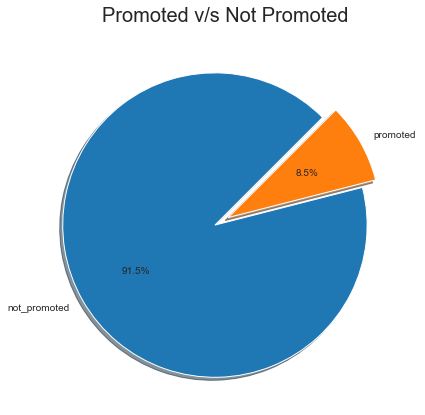

********************************************************************************
Class not_promoted: 36224 		Class promoted: 3374
********************************************************************************
Not promoted: 91.48% of the dataset 	Promoted: 9.0% of the dataset
********************************************************************************


In [18]:
k=df_eda.is_promoted.value_counts() #Checking the frequency of each class
plt.figure(figsize=(7,7))
plt.pie(
    df_eda.is_promoted.value_counts(),
    labels = ['not_promoted', 'promoted'],
    shadow = True,
    #colors = ['lightblue','lightgreen'],
    explode = (0.10 , 0),
    startangle = 45,
    autopct = '%1.1f%%'
    )

plt.title("Promoted v/s Not Promoted ",fontsize=20)
plt.show()
super_star(80)
print("Class not_promoted: " +str(k[0])+" \t\tClass promoted: "+str(k[1]))
super_star(80)
print('Not promoted: '+str(round(k[0]/len(df_eda) * 100,2))+'% of the dataset','\tPromoted: '+ str(round(round(k[1]/len(df_eda) * 100,2))) +'% of the dataset')
super_star(80)

___
### Observation 
We have a *binary classification* problem which has two classes`(promoted=1 not_promoted=0)` which are present as 90% in 'not_promoted' class and 10% in the 'promoted' class as seen in the above chart.<br>
If we train our classification model on this data it may just ignore the class 'promoted' while predicting.
So the model may give 90% accuracy on a data, but if we look closely we may see that 90% of the data belonged to a single class.<br><br>
The reason we get high accuracy on an imbalanced data (with most of the instances in not_promoted) is because the model looks at the data and decides that the best thing to do is to always predict `not_promoted` and achieve high accuracy.<br>
This usually results into *__accuracy pradox__* (model will have high accuracy but low predictive power) so classification accuracy alone is not sufficient to select a model for this problem, we also need to consider the `Precision`, `Recall` and `F1 scores`. 

#### Inference
It is very important to resample the data, as the Target class is Highly imbalanced.
___

___
## 1.Univariate Analysis
<a id="uva"></a>

- **provides summary statistics for each field in the data.**
___


   

**Getting an overview of distribution of each numeric variables in the data**

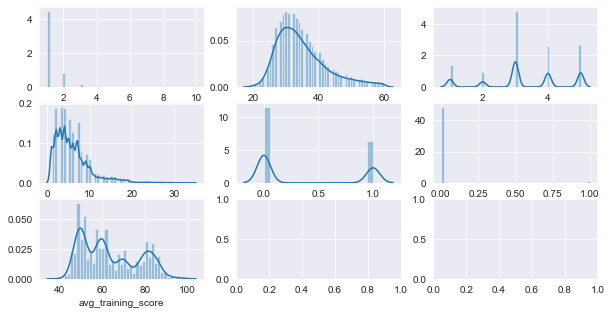

In [19]:
fig, axes = plt.subplots(3, 3,figsize=(10, 5))
sns.distplot(df_eda['no_of_trainings'], kde=True,ax=axes[0,0])
sns.distplot(df_eda['age'],kde=True,ax=axes[0,1])
sns.distplot(df_eda['previous_year_rating'],kde=True,ax=axes[0,2])
sns.distplot(df_eda['length_of_service'],kde=True,ax=axes[1,0])
sns.distplot(df_eda['KPIs_met >80%'],kde=True,ax=axes[1,1])
sns.distplot(df_eda['awards_won?'],kde=True,ax=axes[1,2])
sns.distplot(df_eda['avg_training_score'],kde=True,ax=axes[2,0])
plt.show()

   1.1) **Box Plots**
   <a id="bxplt"></a>
   * __Why I have done this?__ <br>
   A boxplot can give us a good indication of how the values in the data are spread out, it is a standardized way of seeing the distribution of data based five parameters **`minimum, first quartile (Q1), median, third quartile (Q3), and maximum`**. This plot can tell us about the outliers and what their values are. It also tells us if the data is symmetrical, how tightly the data is grouped or if the data is skewed.
   

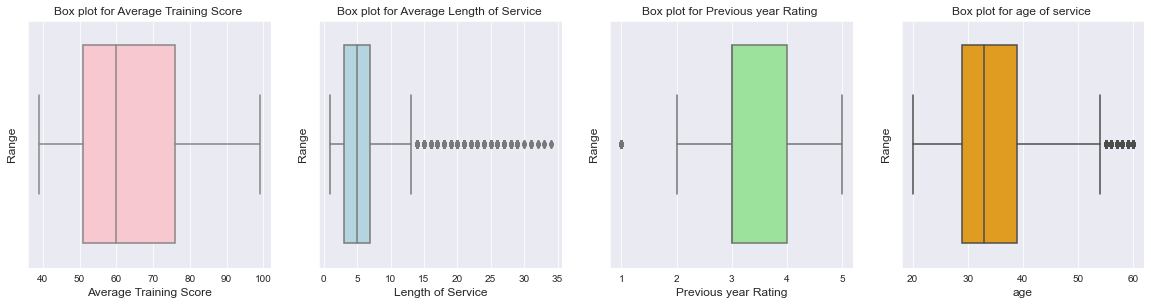

In [20]:
#Box plot for average training score
plt.figure(figsize=(20,10))
plt.subplot(2, 4, 1)
sns.boxplot(df_eda['avg_training_score'], color = 'pink')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title("Box plot for Average Training Score ")

# Box plot for length of service
plt.subplot(2, 4, 2)
sns.boxplot(df_eda['length_of_service'], color = 'lightblue')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title("Box plot for Average Length of Service ")

# Box plot for previous_year_rating
plt.subplot(2, 4, 3)
sns.boxplot(df_eda['previous_year_rating'], color = 'lightgreen')
plt.xlabel('Previous year Rating', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title("Box plot for Previous year Rating ")

# Box plot for age
plt.subplot(2, 4, 4)
sns.boxplot(df_eda['age'], color = 'orange')
plt.xlabel('age', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title("Box plot for age of service ")


plt.show()

### Observations
From the above plot we get an idea of the distribution of values for the specific columns by measures of central tendency(median, mean, and mode)

#### Inference
- For `Average training Score` the value ranges from about 39 to max 99 and 50% of the employees has an average training score between 50 to 78.

- For values under `Length of service` we can see that 50% of employees have served the company for about 4 to 7 years and some employees are associated with the company for a maximum of 37 years. Values ranging from 14 to 37 years have been shown as outlying values for this column.

- For `previous year rating` the value lies between 2 to 5 with few outliers with rating 1, 50% of the employees are rated between 3 and 4.

- `age` column ranges from 20 to maximum 54 years and has some outlying values arround 60 years of age.We can also see that 50% of the employee working in this company are between 28 to 39 years of age. We also see that the distribution is slightly right skewed.


___
1.2) **Distribution Plots**
<a id="distplt"></a>
   * __Why I have done this?__ <br>
   Distplot lets you show a histogram with a line on it, distplot plots a univariate distribution of observations, helps to see the skewness and the frequency of the data.

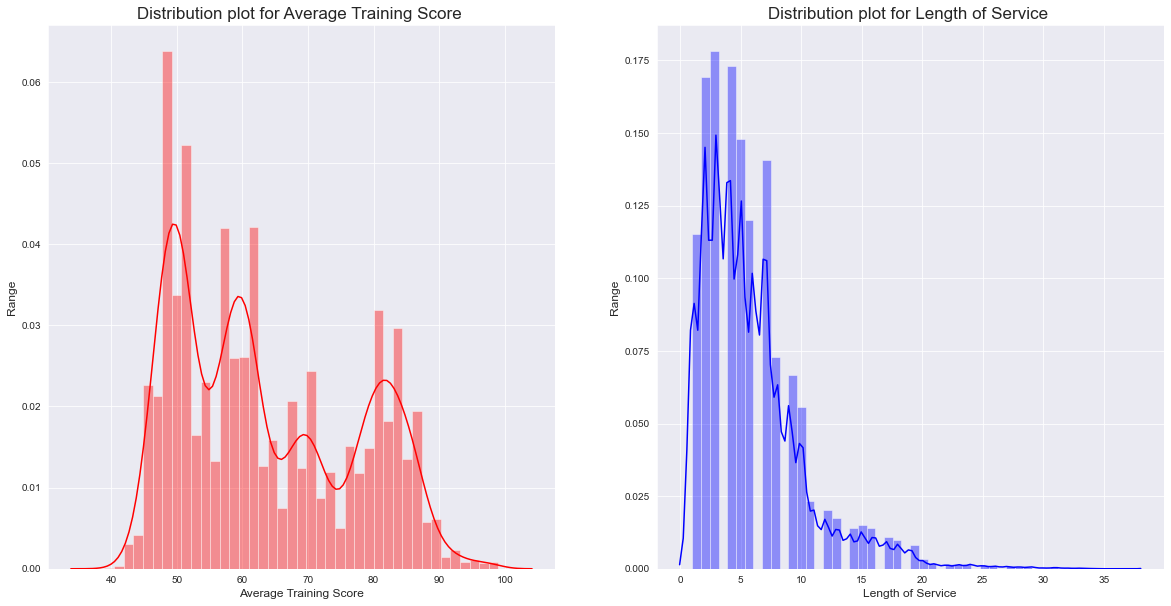

In [21]:
plt.figure(figsize=(20,10))

# Distribution plot for Average Training Score
plt.subplot(1, 2, 1)
sns.distplot(df_eda['avg_training_score'], color = 'r')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title("Distribution plot for Average Training Score ",fontsize = 17)

# Distribution plot for Length of Service
plt.subplot(1, 2, 2)
sns.distplot(train['length_of_service'], color = 'blue')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title("Distribution plot for Length of Service ",fontsize = 17)
plt.show()

### Observations
- We can see that Average training score obtaines by most employee is about 50 to 60
- Most employee stay with the company bupto 10 years

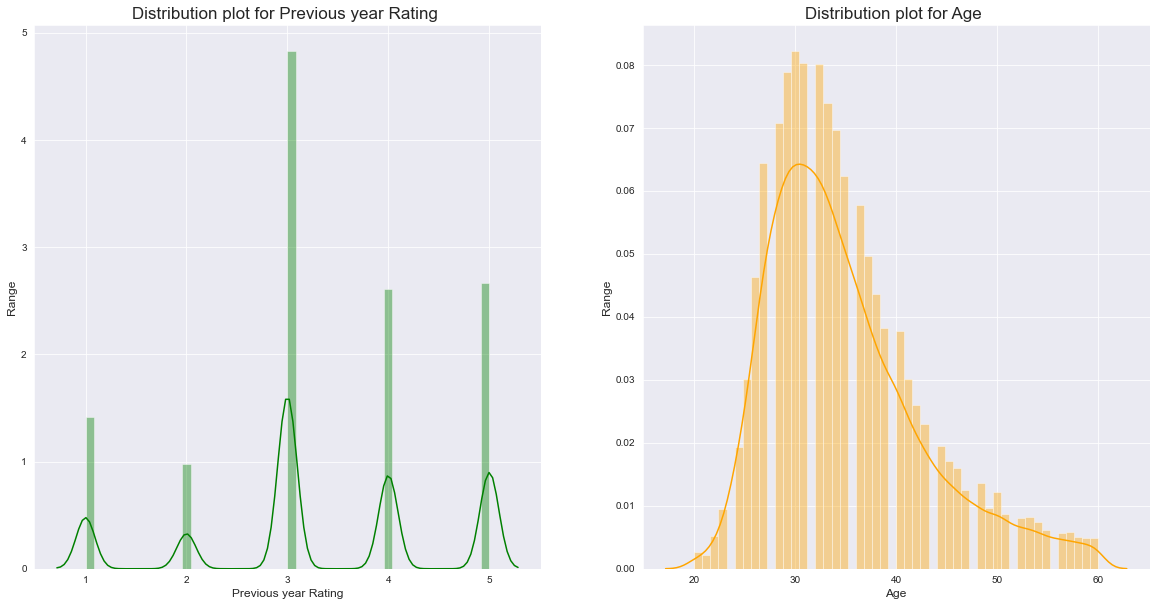

In [22]:
plt.figure(figsize=(20,10))
# Distribution plot for Previous year Rating
plt.subplot(1, 2, 1)
sns.distplot(df_eda['previous_year_rating'], color = 'green')
plt.xlabel('Previous year Rating', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title("Distribution plot for Previous year Rating ",fontsize = 17)

# Distribution plot for age
plt.subplot(1, 2, 2)
sns.distplot(df_eda['age'], color = 'orange')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title("Distribution plot for Age ",fontsize = 17)

plt.show()


### Observations
- Most employee has a rating of 3
- The company has most employee in the age range 25 to 40 years of age. We also see that the distribution is possitive skewed, we can transform it into a normal distribution

In [23]:
'''sns.FacetGrid(df_eda, hue="is_promoted", size=5).map(sns.distplot, "avg_training_score").add_legend()'''

'sns.FacetGrid(df_eda, hue="is_promoted", size=5).map(sns.distplot, "avg_training_score").add_legend()'

___
1.3) **Q-Q Plots**
<a id="qqplt"></a>
   * __Why I have done this?__ <br>
   This plot provides a summary of whether the distributions of two variables are similar or not with respect to the locations, so this will give us more insigts about the strength and variation of skewness and kurtosis and help us get a normal distribution.<br>
   We want normal distributions because  machine learning models in general assume that the variables are normally distributed.


In [24]:
#func to plot the displot and probability plot
def diagnostic_plots(train, variable):
 
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.distplot(train[variable], color = 'green')
    plt.title("Distribution plot",fontsize = 17)



    plt.subplot(1, 2, 2)
    stats.probplot(train[variable], dist="norm", plot=pylab)
    plt.title("Probanility plot",fontsize = 17)

    plt.show()
    

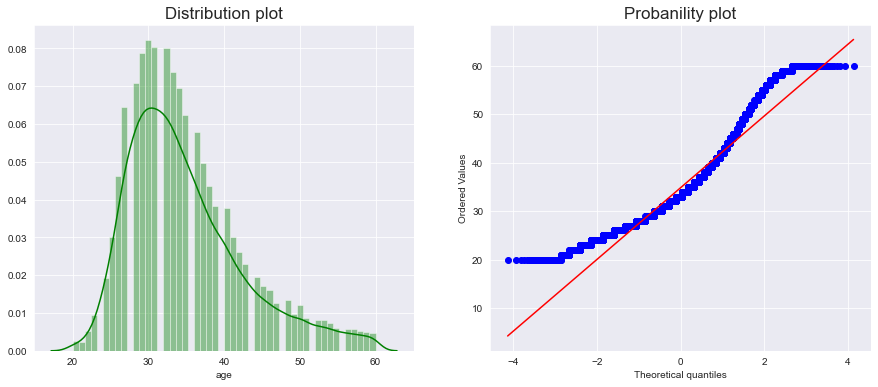

*******************************************************************************************************************************
Skewness of data 1.0038874891266372 			 | 		Kurtosis of data 0.7839501174917296
*******************************************************************************************************************************


In [25]:
#-------------------------------------------------for AGE-----------------------------------------------------------------    
diagnostic_plots(df_eda,'age') 
super_star(127)
print("Skewness of data",skew(df_eda['age']),"\t\t\t | \t\tKurtosis of data",kurtosis(df_eda['age']))
super_star(127)

### Observations
- We can conform that the age distribution is right/possitive skewed as skewness is `>1`.
- Positive values of kurtosis`(0.78)` indicate that the distribution is peaked and possess thick tails(Leptokurtic distribution) which indicates that the distribution has more of the values are located in the tails of the distribution rather than around the mean.

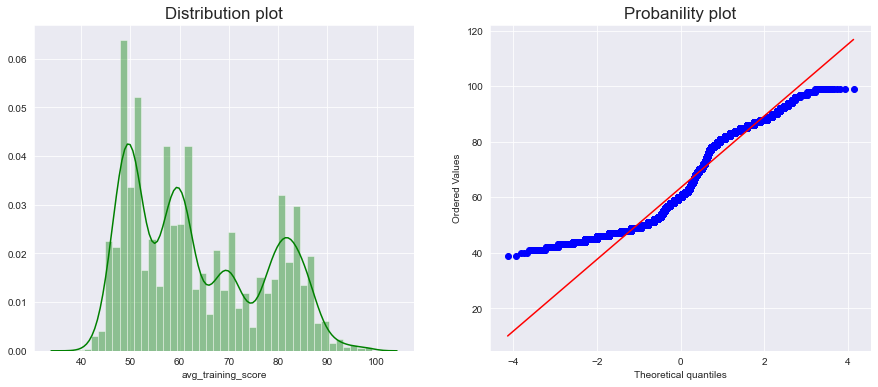

*******************************************************************************************************************************
Skewness of data 0.44733624355486334 			 | 		Kurtosis of data -1.0577106898866173
*******************************************************************************************************************************


In [26]:
#-------------------------------------------------for Average Training Score----------------------------------------------    
diagnostic_plots(df_eda,'avg_training_score') 
super_star(127)
print("Skewness of data",skew(df_eda['avg_training_score']),"\t\t\t | \t\tKurtosis of data",kurtosis(df_eda['avg_training_score']))
super_star(127)

### Observations
- We can conform that the avg_training_score distribution is right/possitive skewed as skewness is `>1`.
- Possitive values of kurtosis`(-1.05)` indicate that the distribution is flat and has thin tails(Platykurtic distributions) which indicates that the distribution is less peaked when compared with the normal distribution, with fewer values in its shortertails.



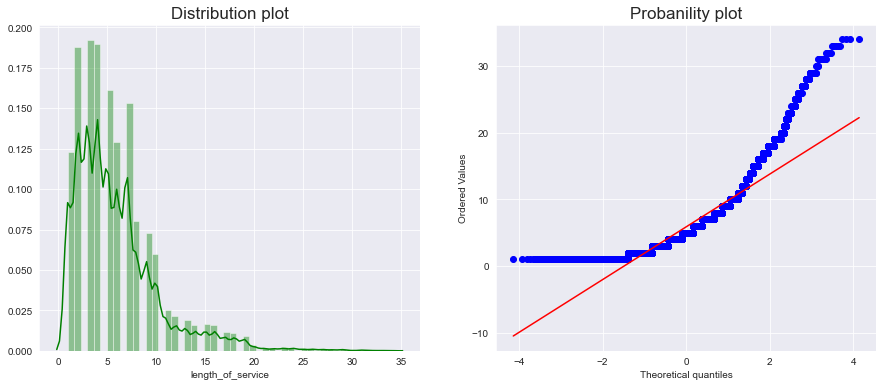

*******************************************************************************************************************************
Skewness of data 1.7389163982861975 			 | 		Kurtosis of data 4.374205741450098
*******************************************************************************************************************************


In [27]:
#-------------------------------------------------for Length of service----------------------------------------------    
diagnostic_plots(df_eda,'length_of_service') 
super_star(127)
print("Skewness of data",skew(df_eda['length_of_service']),"\t\t\t | \t\tKurtosis of data",kurtosis(df_eda['length_of_service']))
super_star(127)

### Observations
- We can conform that the length_of_service distribution is right/possitive skewed as skewness is `>1`.
- Positive values of kurtosis`(4.3)` indicate that the distribution is peaked and possess thick tails(Leptokurtic distribution) which indicates that the distribution has more of the values are located in the tails of the distribution rather than around the mean.

___
1.4) **Count Plots**
<a id="countplt"></a>
   * __Why I have done this?__ <br>
   The count plot can reveal lots of facts that are not directly noticeable from the raw data.This basically show the counts of observations in each category.

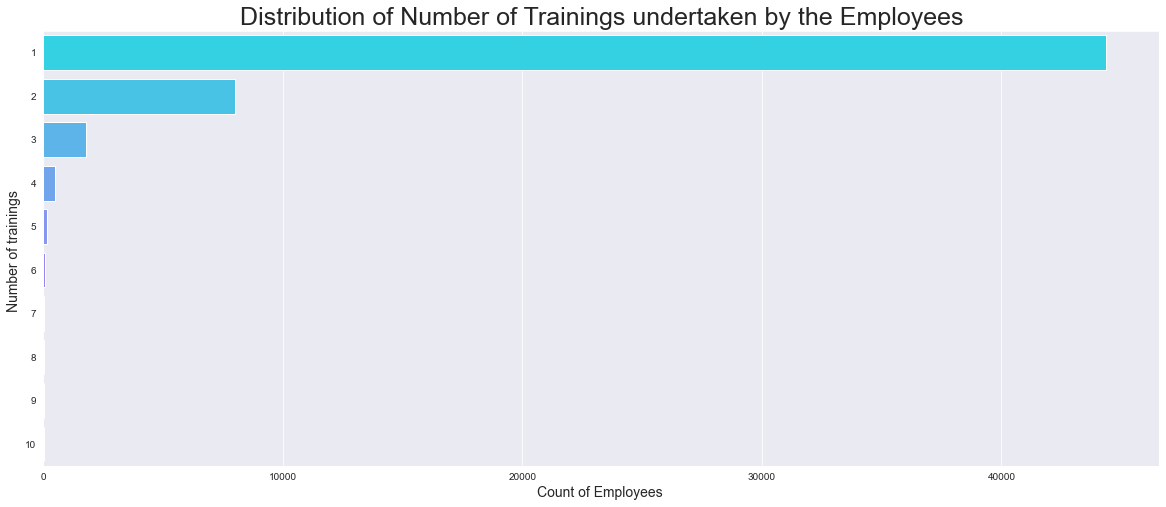

In [28]:
#------------------- Countplot to show Distribution of Number of Trainings undertaken by the Employees------------------------
plt.figure(figsize=(20, 8)) 
sns.countplot(y=train['no_of_trainings'], palette = 'cool')
plt.xlabel('Count of Employees ', fontsize = 14)
plt.ylabel('Number of trainings ', fontsize = 14)
plt.title('Distribution of Number of Trainings undertaken by the Employees', fontsize = 25)
plt.show()


### Observations 
From the above Countplot we can see that:
- more that 45,000 employee have only undergone only 1 training. 
- less than 10,000 of the employees have undergone more than 1 number trainings.

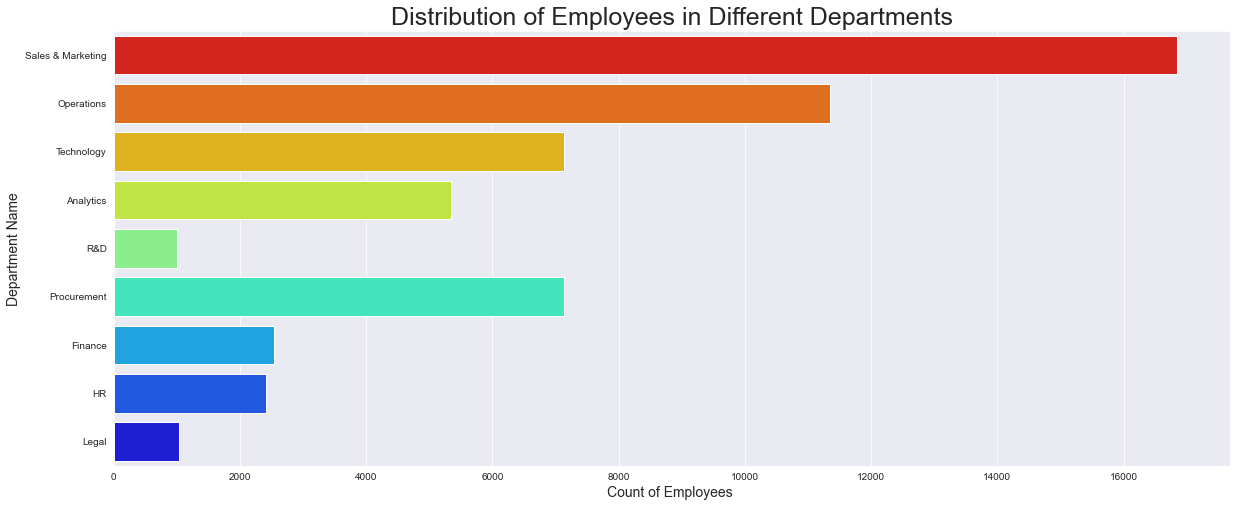

In [29]:
plt.figure(figsize=(20, 8)) 
sns.countplot(y = train['department'], palette = 'jet_r')
plt.xlabel('Count of Employees ', fontsize = 14)
plt.ylabel('Department Name',fontsize=14)
plt.title('Distribution of Employees in Different Departments', fontsize = 25)

plt.show()

### Observations 
From the above Countplot we can see that:
- Most employees(>16,000) work under the Slaes & marketting department, followed by operations and technology. 
- Employees working under the R&D are cisiderably lower in count than the other departments.

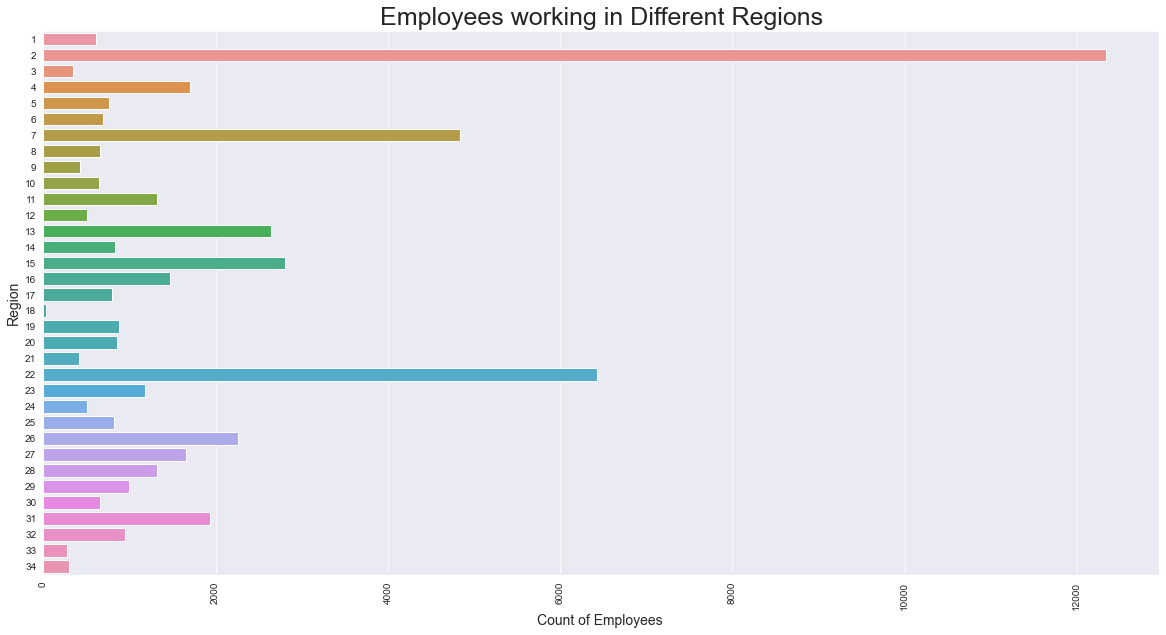

In [30]:
#distribution of different Regions
plt.figure(figsize=(20, 10)) 
sns.countplot(y = train['region'])
plt.xlabel('Count of Employees ', fontsize = 14)
plt.ylabel('Region', fontsize = 14)
plt.title('Employees working in Different Regions', fontsize = 25)
plt.xticks(rotation = 90)

plt.show()

### Observation
The company operates across 34 regions with most employment occuring in region 2 followed by region 22 and region 7.

___
1.5) **Pie Charts**
<a id="pieplt"></a>
   * __Why I have done this?__ <br>
   Pie charts are helpful in showing percentage or proportional data represented by each category.
Pie charts are good for displaying data where we have very few categories.

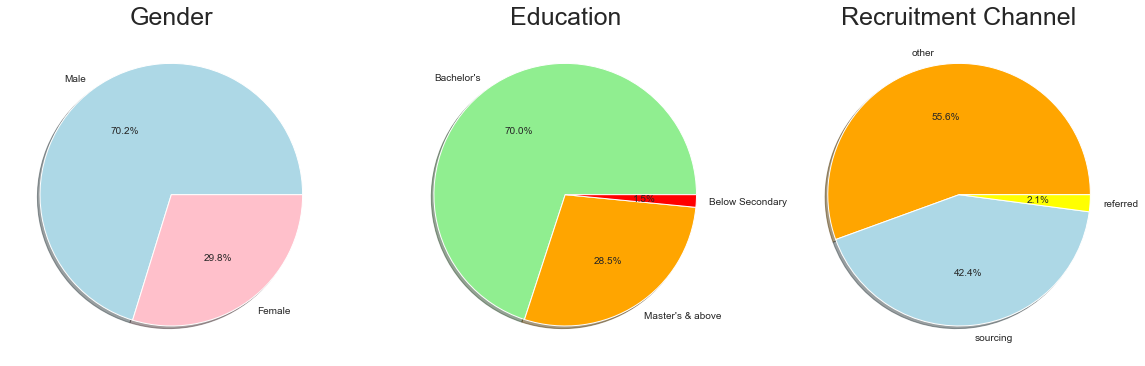

In [31]:
plt.figure(figsize=(20, 20)) 


#----------------------------------- plotting a pie chart of Gender of the Employees------------------------------------------
plt.subplot(1, 3, 1)
sizes = train['gender'].value_counts()
plt.pie(sizes, labels = ['Male','Female'], shadow = True,colors = ['lightblue','pink'],autopct = '%1.1f%%')
plt.title('Gender', fontsize = 25)



#------------------------------- plotting a pie chart of Education levels of the Employees-------------------------------------
plt.subplot(1, 3, 2)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
plt.pie(sizes, labels = labels, shadow = True,colors = ['lightgreen','orange','red'],autopct = '%1.1f%%')
plt.title('Education', fontsize = 25)



#-----------------------------plotting a pie chart of Recruitment Channel of the Employees------------------------------------
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
plt.pie(sizes, labels = labels, shadow = True,colors = ['orange','lightblue','yellow'],autopct = '%1.1f%%')
plt.title('Recruitment Channel', fontsize = 25)

plt.show()

### Observations
- The company operates with **70.2% of male employees** and **29.8% of female employees**
- The company recruits more number of employees with a **Bachelor's degree(70%)** followed by employees with a **Master's degree(28.5%)** and very few from education level of **Below Secondary(1.5%)**
- The company has recruited employees as 42.4% from **sourcing** and 2.1% from **referred chanells**.


___
1.6) **PDF and CDF**
<a id="pdfcdf"></a>
   * __Why I have done this?__ <br>
    The PDF returns the expected probability for observing a value.The cdf represents the cumulative values of the pdf


*******************************************************************************************************************************
PDF: ; 0.0017783046828689986; 0.01096621221102549; 0.03200948429164197; 0.08891523414344993; 0.1304090100770599; 0.1342620035566094; 0.13574392412566688; 0.12062833432128041; 0.08446947243627743; 0.07291049199762895; 0.04682868998221696; 0.036158861885002974; 0.02548903378778898; 0.016004742145820986; 0.015411973918197989; 0.01452282157676349; 0.010077059869590992; 0.008595139300533494; 0.005631298162418495; 0.009187907528156493
*******************************************************************************************************************************

Bin Edges= ; 20.0; 22.0; 24.0; 26.0; 28.0; 30.0; 32.0; 34.0; 36.0; 38.0; 40.0; 42.0; 44.0; 46.0; 48.0; 50.0; 52.0; 54.0; 56.0; 58.0; 60.0
*******************************************************************************************************************************

CDF: ; 0.0017783046828689986; 0.01274451689

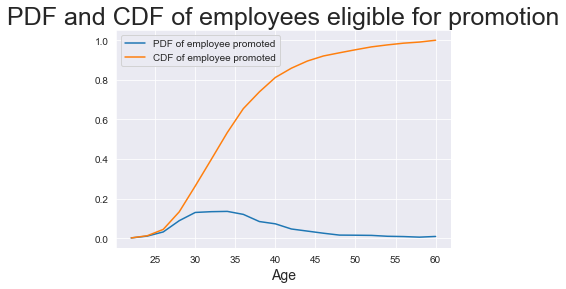

In [32]:
#------------------------------------Separating the promotednon promoted employee data----------------------------------------
promoted = df_eda[df_eda["is_promoted"]==1]
not_promoted = df_eda[df_eda["is_promoted"]==0]


plt.title('PDF and CDF of employees eligible for promotion', fontsize = 25)
counts, bin_edges = np.histogram(promoted["age"], bins=20, density=True)
plt.xlabel('Age', fontsize = 14)
super_star(127)
pdf = counts/sum(counts)
print("PDF: ",*pdf,sep='; ')
super_star(127)
print("\nBin Edges= ",*bin_edges,sep='; ')
super_star(127)
cdf = np.cumsum(pdf)
print("\nCDF: ",*cdf,sep='; ')
super_star(127)
plt.plot(bin_edges[1:],pdf, label="PDF of employee promoted")
plt.plot(bin_edges[1:],cdf, label="CDF of employee promoted") 
plt.legend()
plt.show()

### Observations
- If we draw a straight line from Age value at 35, then it intersects the curve Cummulative distribution funtion(yellow) at value approximately equal to 0.6 i.e there are 60% people from cummulative sum of 20 to 35 age eligible for promotion


___
## 2. Bivariate Analysis
<a id="bva"></a>
- Simple statistical analysis involving two variables for determining the empirical relationship between them

___

  

**Getting an overview of the possible plots for each categorical variables and target variable**

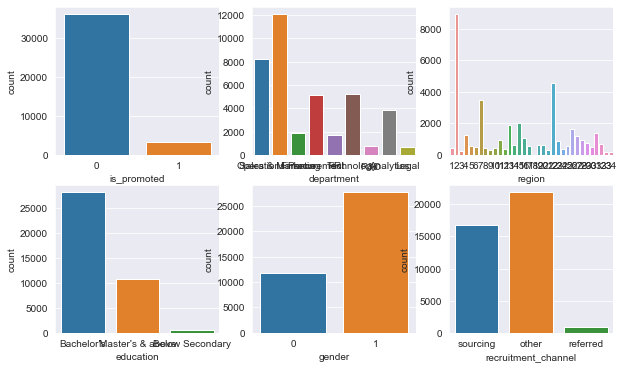

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

sns.countplot('is_promoted',data=df_eda,ax=axes[0,0])
sns.countplot('department',data=df_eda,ax=axes[0,1])
sns.countplot('region',data=df_eda,ax=axes[0,2])
sns.countplot('education',data=df_eda,ax=axes[1,0])
sns.countplot('gender',data=df_eda,ax=axes[1,1])
sns.countplot('recruitment_channel',data=df_eda,ax=axes[1,2])
plt.show()

 1.1) **Count Plots**
 <a id="bvcountplt"></a>
   * __Why I have done this?__ <br>
   CountPlots are good to show the variations between categories, we can see how promotion varies with each category

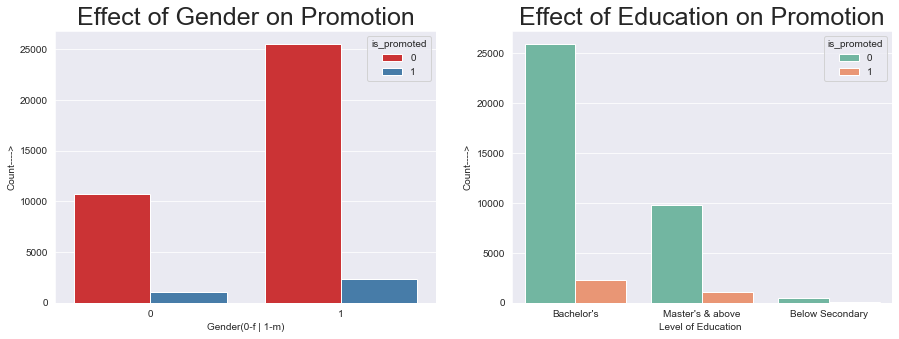

************************************************************************************************************************
						 :Proportions:
************************************************************************************************************************

Number of female employees promoted:  1063
Number of male employees promoted:  2311

Rate of promotion for Male Employee:  19.614666440332712
Rate of promotion for Female Employee:  3.8215415588150705 


************************************************************************************************************************ 

************************************************************************************************************************ 


Employees with Bacheol's degree promoted:  2265
Employees with Master's & above degree promoted:  1063
Employees with Below Secondary degree promoted:  46

Rate of promotion for employees with Master's & above degree:  9.813515509601181
Rate of promotion for employees with Bacheol's d

In [34]:

plt.figure(figsize=(15,5))

#---------------------------------------------------Gender v/s Promotion--------------------------------------------------------
plt.subplot(1, 2, 1)
plt.title("Effect of Gender on Promotion",fontsize = 25)
sns.countplot(df_eda['gender'],hue = df_eda['is_promoted'],palette="Set1")
plt.xlabel('Gender(0-f | 1-m)', fontsize = 10)
plt.ylabel('Count---->', fontsize = 10)




#---------------------------------------------------Education v/s Promotion----------------------------------------------------
plt.subplot(1, 2, 2)
plt.title("Effect of Education on Promotion",fontsize = 25)
sns.countplot(df_eda['education'],hue = df_eda['is_promoted'],palette="Set2")
plt.xlabel('Level of Education ', fontsize = 10)
plt.ylabel('Count---->', fontsize = 10)

plt.show()





#-----------------------------------------------proportions for gender------------------------------------------------------
k=df_eda.gender.value_counts()
#print(k)
super_star(120)
print("\t\t\t\t\t\t :Proportions:")
super_star(120)
j=df_eda.groupby(['gender','is_promoted'])['is_promoted'].count()

print("\nNumber of female employees promoted: " ,j[0][1])
print("Number of male employees promoted: ",j[1][1])

print("\nRate of promotion for Male Employee: " ,((j[1][1])/k[0])*100) 
print("Rate of promotion for Female Employee: ",((j[0][1])/k[1])*100 ,'\n\n')


#-----------------------------------------------proportions for education------------------------------------------------------
k=df_eda.education.value_counts()
#print(k)
super_star(120,2)
j=df_eda.groupby(['education','is_promoted'])['is_promoted'].count()

print("\nEmployees with Bacheol's degree promoted: " ,j[1])
print("Employees with Master's & above degree promoted: " ,j[5])
print("Employees with Below Secondary degree promoted: " ,j[3])

print("\nRate of promotion for employees with Master's & above degree: " ,(j[5]/k[1])*100) 
print("Rate of promotion for employees with Bacheol's degree: " ,(j[1]/k[0])*100) 
print("Rate of promotion for employees with Below Secondary: " ,(j[3]/k[0])*100)

### Observations
- Promotion rates of **male employees(19.6%)** are much higher than that of **fe-male employees(3.85%)**.
- Employees with education level of **Master's & above have higher chances of getting promoted(9.8%)** followed by the ones with a **Bachelor's degree(8.03%)**, employees with education level **Below secondary have least chances of getting promoted(0.16%)**.



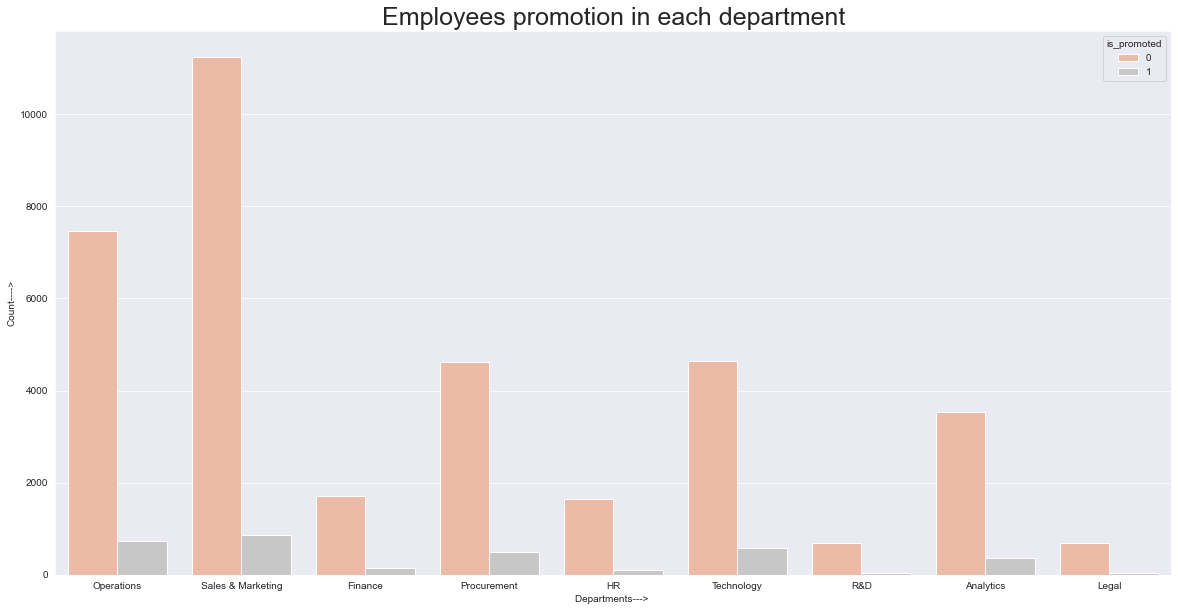

************************************************************************************************************************
						 :Proportions:
************************************************************************************************************************

Rate Of promotion from Sales & Marketing Department:  7.184145334434351

Rate Of promotion from Operations Department:  9.003411306042885

Rate Of promotion from Technology Department:  11.204588910133843

Rate Of promotion from Procurement Department:  9.761811792268645

Rate Of promotion from Analytics Department:  9.198660139139397

Rate Of promotion from Finance Department:  7.775377969762419

Rate Of promotion from HR Department:  5.6192660550458715

Rate Of promotion from R&D Department:  6.420765027322404

Rate Of promotion from Legal Department:  4.58970792767733
************************************************************************************************************************


In [35]:
plt.figure(figsize=(20,10))
plt.title("Employees promotion in each department",fontsize = 25)
sns.countplot(x=df_eda['department'],hue = df_eda['is_promoted'],palette="RdGy")
plt.xlabel('Departments---> ', fontsize = 10)
plt.ylabel('Count---->', fontsize = 10)
plt.show()


k=df_eda.department.value_counts()
j=df_eda.groupby(['department','is_promoted'])['is_promoted'].count()#Grouping dept by is_promoted
j.tolist()
#k[7]

#-------------------------------------------------------Proportions-----------------------------------------------------

super_star(120)
print("\t\t\t\t\t\t :Proportions:")
super_star(120)
print("\nRate Of promotion from Sales & Marketing Department: ", (j[15]/k[0])*100)     #0
print("\nRate Of promotion from Operations Department: ", (j[9]/k[1])*100)             #1
print("\nRate Of promotion from Technology Department: ", (j[17]/k[2])*100)            #2 
print("\nRate Of promotion from Procurement Department: ", (j[11]/k[3])*100)           #3
print("\nRate Of promotion from Analytics Department: ", (j[1]/k[4])*100)              #4
print("\nRate Of promotion from Finance Department: ", (j[3]/k[5])*100)                #5
print("\nRate Of promotion from HR Department: ", (j[5]/k[6])*100)                     #6
print("\nRate Of promotion from R&D Department: ", (j[13]/k[7])*100)                   #7
print("\nRate Of promotion from Legal Department: ", (j[7]/k[8])*100)                  #8
super_star(120)


### Observations
- We can see that employees working in the **Technology department have higher chances of being promoted(11.2%)** followed by employees working **Procurement Department(9.7%)** and **Analytics Department(9.1)** 
- Employees woking in the **legal Department has least chances of being promoted (4.5%)**

___

   1.2) **Line Plots**
   <a id="bvlineplt"></a>
   * __Why I have done this?__ <br>
   LinePlots are good to show the variations between two categories on a certain value, we can see how promotion varies with each category

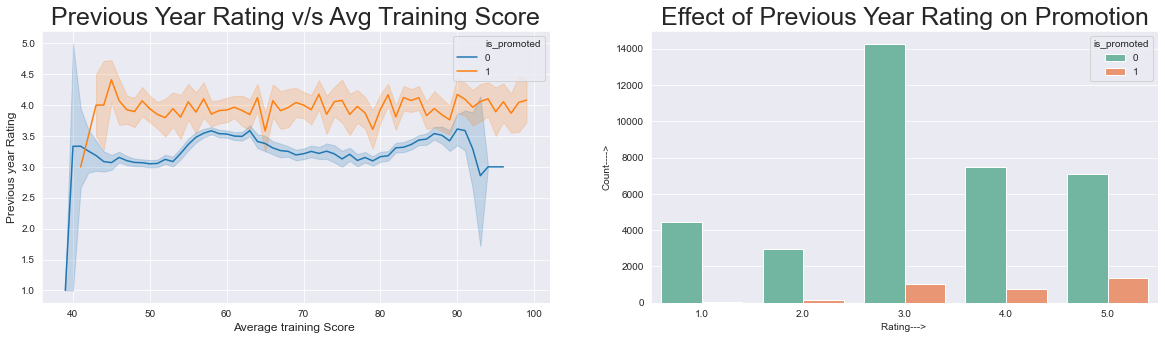

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title("Previous Year Rating v/s Avg Training Score",fontsize = 25)
ax = sns.lineplot(x="avg_training_score", y="previous_year_rating", hue="is_promoted",data=df_eda)
plt.xlabel('Average training Score ', fontsize = 12)
plt.ylabel('Previous year Rating', fontsize = 12)


plt.subplot(1, 2, 2)
plt.title("Effect of Previous Year Rating on Promotion",fontsize = 25)
sns.countplot(df_eda['previous_year_rating'],hue = df_eda['is_promoted'],palette="Set2")
plt.xlabel('Rating---> ', fontsize = 10)
plt.ylabel('Count---->', fontsize = 10)

plt.show()
plt.show()

### Observations:
- Employees below 3.0 rating are not promoted.
- Average training score should be more than 40 for being promoted
- People who have average score of above 40 and rating above 3.0 are more likely to get promoted
- Chances of Promotion increases with previous year rating.




___

   1.3) **Scatter Plots**
   <a id="bvsctrplt"></a>
   * __Why I have done this?__ <br>
   SctterPlots are good to show the corelations between categories on a certain value, we can see how promotion varies with each category

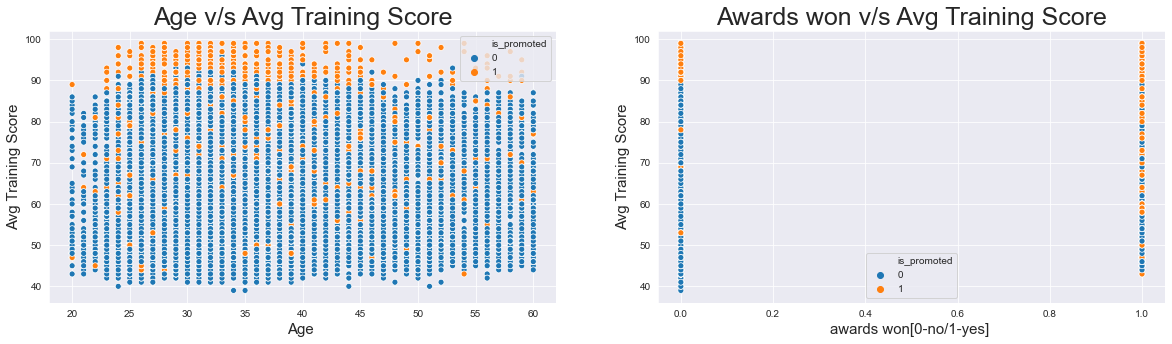

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title("Age v/s Avg Training Score",fontsize = 25)
sns.scatterplot(x='age',y='avg_training_score',hue='is_promoted',data=df_eda)
plt.xlabel('Age ', fontsize = 15)
plt.ylabel('Avg Training Score', fontsize = 15)

plt.subplot(1, 2, 2)
plt.title("Awards won v/s Avg Training Score",fontsize = 25)
sns.scatterplot(x='awards_won?',y='avg_training_score',hue='is_promoted',data=df_eda)
plt.xlabel('awards won[0-no/1-yes] ', fontsize = 15)
plt.ylabel('Avg Training Score', fontsize = 15)
plt.show()

### Observations:
From the above graphs we can infer that the promotions are majorly dependent on the score and awards won Rather than age.

___

## Multivariate Analysis
<a id="mvpairplt"></a>
-  Multivariate analysis is a form of statistical analysis that examine patterns in multidimensional data by considering, at once, several data variables
___
### Using a PairGrid
* __Why I have done this?__<br>
This will show a clear and nice view of all variables and their realtion ship with all other variables.<br><br>

* __Apporach__<br>
I have used PairGrid and scatter plot as it allows us to draw a grid of subplots using the same plot type to visualize data, using different pair of variable for each subplot and passed `hue=is_promoted` to vizualize how promotion varies w.r.t the other non-categorical features .
___


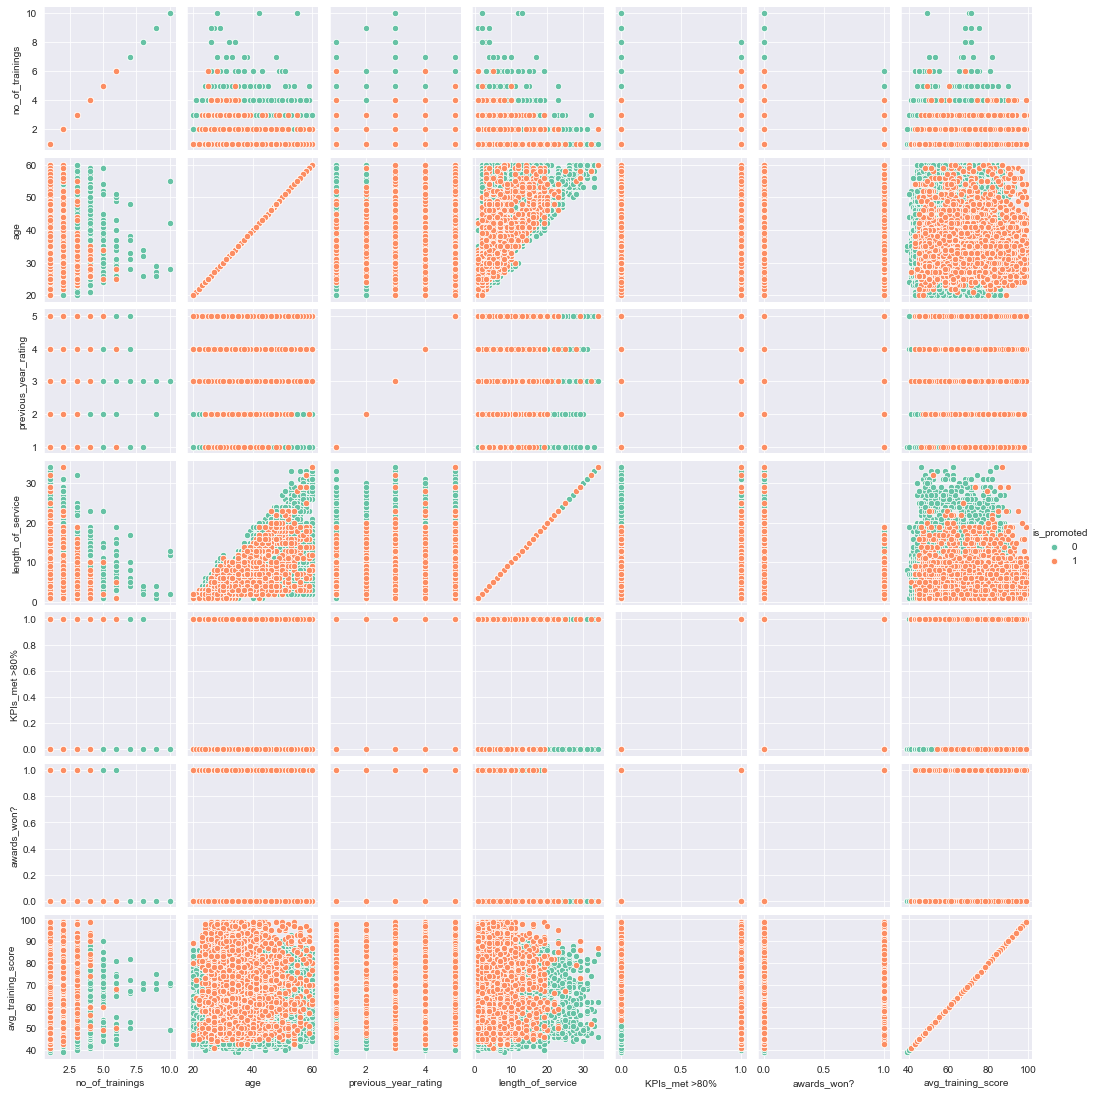

In [38]:
g = sns.PairGrid(df_eda, hue="is_promoted", vars=['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','KPIs_met >80%', 'awards_won?', 'avg_training_score'], palette="Set2")
g = g.map(sns.scatterplot, linewidths=1, edgecolor="w", s=40)

g = g.add_legend()
g.fig.set_size_inches(15,15)

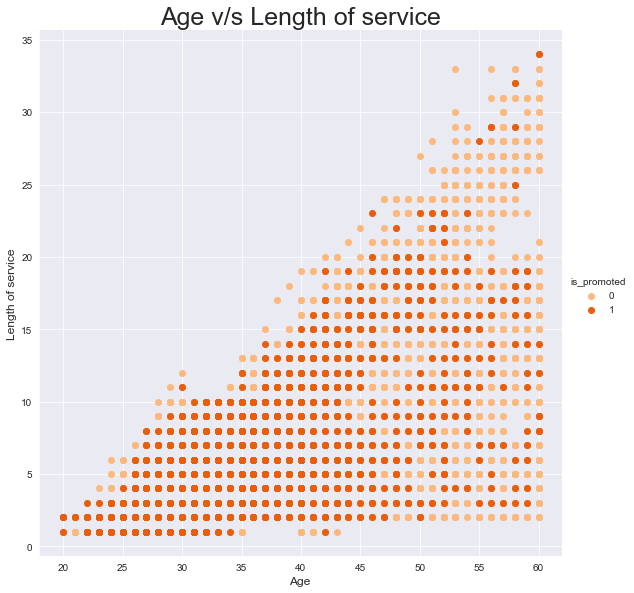

In [39]:
sns.FacetGrid(df_eda, hue="is_promoted", size=8,palette="Oranges").map(plt.scatter, "age", "length_of_service").add_legend()
plt.xlabel('Age ', fontsize = 12)
plt.ylabel('Length of service', fontsize = 12)
plt.title("Age v/s Length of service",fontsize = 25)
plt.show()

### Observation
- Employees with age between 25 to 45 years and lenght of service between 3 to 8 years are more likely to be promoted

___

### Correlation HeatMap
<a id="mvheatplt"></a>
* __Why I have done this?__<br>
**Correlation** is a statistical technique that can show whether and how strongly pairs of variables are related.<br><br>

* __Apporach__<br>
I have used __`.corr()`__ funtion to get the values of correlation and then used the heatmap to show the values of correlation among the features.

___

Correlation Heatmap (Non-Categorical features): 




<Figure size 864x576 with 0 Axes>

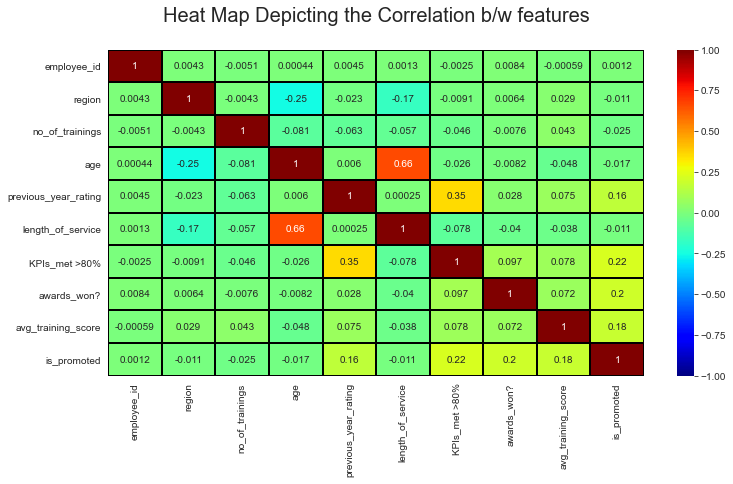

In [40]:
print("Correlation Heatmap (Non-Categorical features): \n\n")
plt.figure(figsize=(12,8))
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),annot = True,vmin=-1, vmax=1,center= 0,cmap= 'jet',linewidths=1, linecolor='black')
plt.title("Heat Map Depicting the Correlation b/w features\n",fontsize=20)

'''corrmat = df_eda.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
'''

plt.show()


### Observations:
The above plot shows the correlation of features with one another:
- features __`age`__ and __`length_of_service`__ have highest correlation
- features __`previous_year_rating`__ and __`KPIs_met >80%`__ have high correlation
- features __`KPIs_met >80%`__ ,__`awards_won?`__, __`previous_year_rating`__ and __`avg_training_score`__ shows correlation with __`is_promoted`__ (target) with __`KPIs_met >80%`__ having the strongest correlation.

#### Inference:
1. We can use __`KPIs_met >80%`__ to fill up the missing values in __`previous_year_rating`__ column as they are correlated
2. __`awards_won?`__ and __`avg_training_score`__ may be used to engineer new features as they show high correlation with the target variable and low correlation with other independent variable
___ 

In [41]:
#% of employees promoted
super_star(70)
print(pd.crosstab(df_eda['KPIs_met >80%'],df_eda.is_promoted,normalize='index'))
super_star(70)
print("")
super_star(70,2)
print(pd.crosstab(df_eda['awards_won?'],df_eda.is_promoted,normalize='index'))
super_star(70)
print("")
super_star(70,2)
print(pd.crosstab(df_eda['gender'],df_eda.is_promoted,normalize='index'))
super_star(70)

**********************************************************************
is_promoted           0         1
KPIs_met >80%                    
0              0.961366  0.038634
1              0.829631  0.170369
**********************************************************************

********************************************************************** 

********************************************************************** 

is_promoted         0         1
awards_won?                    
0            0.923194  0.076806
1            0.565124  0.434876
**********************************************************************

********************************************************************** 

********************************************************************** 

is_promoted         0         1
gender                         
0            0.909778  0.090222
1            0.916918  0.083082
**********************************************************************


In [42]:
X_train.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
7923,67911,Operations,8,Bachelor's,1,sourcing,1,25,4.0,1,1,0,61
11245,56403,Sales & Marketing,27,Bachelor's,0,other,1,38,1.0,10,0,0,50
29930,43731,Finance,22,Bachelor's,1,other,1,24,3.0,3,0,0,91


## Resampeling
<a id="res"></a>
* __Why I have done this?__<br>
Previously in EDA we saw that we have an imbalanced dataset and we need to balace it in order to avoid accuracy paradox, so i have used the resampling technique of Oversampling. <br><br>

* __Apporach__<br>
I have used **SMOTE (Synthetic Minority Over-sampling Technique)**,it looks at the feature space for the minority class data points and considers its k nearest neighbours, and specidies the categorical columns.

Class not_promoted: 36224 		Class promoted: 36224
******************************
Train Set-
******************************
Shape of X_train:  (72448, 13) 
Shape of y_train:  (72448,)
******************************

******************************
Test Set-
******************************
Shape of X_test:  (8222, 13) 
Shape of y_test:  (8222,)
******************************

******************************
Validation Set-
******************************
Shape of X_val:  (6988, 13) 
Shape of y_val:  (6988,)
******************************


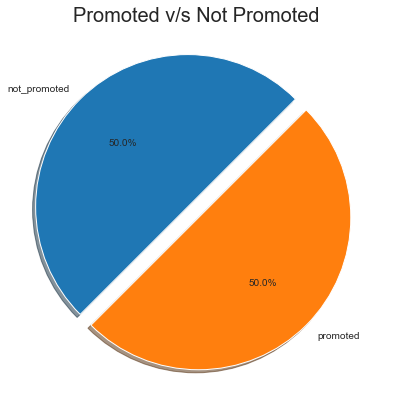

In [43]:
#SMOTE-NC is used for as the dataset contain continuous and categorical features.
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[1,3,5])
X_train, Y_train = sm.fit_resample(X_train, y_train)




k=Y_train.value_counts() #Checking the frequency of each class
plt.figure(figsize=(7,7))
plt.pie(
    Y_train.value_counts(),
    labels = ['not_promoted', 'promoted'],
    shadow = True,
    #colors = ['lightblue','lightgreen'],
    explode = (0.10 , 0),
    startangle = 45,
    autopct = '%1.1f%%'
    )

plt.title("Promoted v/s Not Promoted ",fontsize=20)

print("Class not_promoted: " +str(k[0])+" \t\tClass promoted: "+str(k[1]))




#-------------------Printing the Shapes of the Data After Resampling-----------------------------
#-----------------------------------------------Train Set---------------------------------------
super_star(30)
print("Train Set-")
super_star(30)
print("Shape of X_train: ",X_train.shape,"\nShape of y_train: ",Y_train.shape)
super_star(30)
print()
#-----------------------------------------------Test Set----------------------------------------
super_star(30)
print("Test Set-")
super_star(30)
print("Shape of X_test: ",X_test.shape,"\nShape of y_test: ",y_test.shape)
super_star(30)
print()
#----------------------------------------------Validation Set------------------------------------
super_star(30)
print("Validation Set-")
super_star(30)
print("Shape of X_val: ",X_val.shape,"\nShape of y_val: ",y_val.shape)
super_star(30)

### Observations:
- We now see that the dataset is no longer imbalanced, we have oversampled the minority target value

___
# Feature Egineering
<a id="fe"></a>

Binning the values of `average training score` column

#### Binning the values of `average training score` column
* __Why I have done this?__<br>
Previously in EDA we saw that we have the average training score column with multi modal distribution, so it may reduce the effects of minor observation errors.I used binning  to group the number of more or less continuous values into a smaller number of "bins". <br><br>

* __Apporach__<br>
I have used a `bin_score` divided it to the range `'30-40','40-50','50-60','60-70','70-80','80-90','90-100'` and labeled each categories from 1 to 7 respectively.

In [44]:
bins = [30,40,50,60,70,80,90,100]
labels = ['30-40','40-50','50-60','60-70','70-80','80-90','90-100'] #ranges
#-----------------------------Applying on all sets------------------------------------
X_train['score_binned'] = pd.cut(X_train['avg_training_score'], bins=bins, labels=labels)
X_val['score_binned'] = pd.cut(X_val['avg_training_score'], bins=bins, labels=labels)
X_test['score_binned'] = pd.cut(X_test['avg_training_score'], bins=bins, labels=labels)
test['score_binned'] = pd.cut(test['avg_training_score'], bins=bins, labels=labels)

def bin_Score(x):
    
    if (x=='30-40'):
        score= 1
    elif (x=='40-50'):
        score= 2   
    elif (x=='50-60'):
        score= 3
    elif (x=='60-70'):
        score= 4  
    elif (x=='70-80'):
        score= 5
    elif (x=='80-90'):
        score= 6   
    elif (x=='90-100'):
        score= 7
        
    return score

#-----------------------------Applying on all sets------------------------------------
X_train['score_binned']=X_train['score_binned'].apply(bin_Score)             
X_test['score_binned']=X_test['score_binned'].apply(bin_Score)
X_val['score_binned']=X_val['score_binned'].apply(bin_Score)
test['score_binned']=test['score_binned'].apply(bin_Score)


#### Binning the values of `Age` column
* __Why I have done this?__<br>
Previously in EDA we saw that we have the age column as right skewed distribution, so it may reduce the effects of minor observation errors.I used binning  to group the number of more or less continuous values into a smaller number of "bins". like in `average training score` <br><br>

* __Apporach__<br>
I have used a `bin_age` divided it to the range `'<=26','26-35','35-50','50>'` and labeled each categories from 1 to 4 respectively.

In [45]:
###age into 4 different bins
def bin_Age(x):
    
    if (x<=26):
        age= 1
    elif (x>26 and x<=35):
        age= 2   
    elif (x>35 and x<=50):
        age= 3
    else:
        age= 4
    return age


#----------------------Applying on all sets---------------------------------
X_train['age_bin']=X_train['age'].apply(bin_Age)             
X_test['age_bin']=X_test['age'].apply(bin_Age)
X_val['age_bin']=X_val['age'].apply(bin_Age)
test['age_bin']=test['age'].apply(bin_Age)
#X_train.head()

## Logarithmic transformation
<a id="lt"></a>
* __Why I have done this?__<br>
Previously in EDA we saw that we have the age, training score and length of service were not in normal distribution, will try to bring them under normal distribution by applyting the logarithmic function <br><br>


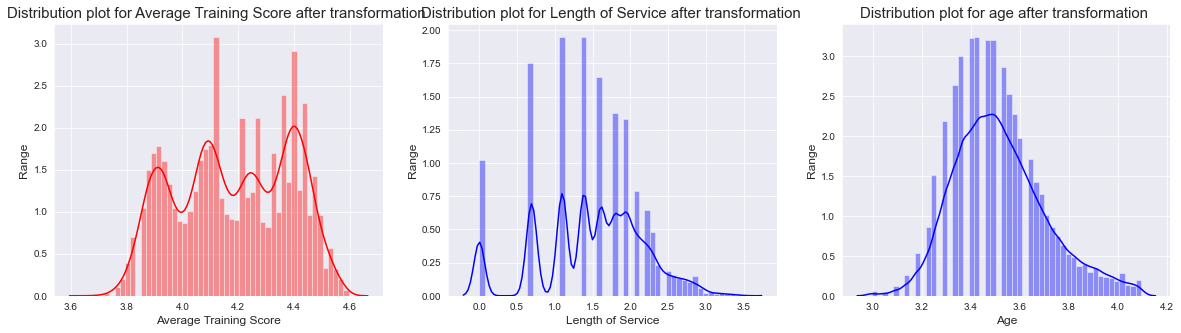

In [46]:
'''def log_tr(x):
    return np.log(x)'''

# Trying Logarithmic transformation on the continuous variable age
X_train["age_tr"] = np.log(X_train["age"])
X_val["age_tr"] = np.log(X_val["age"])
X_test["age_tr"] = np.log(X_test["age"])
test["age_tr"] = np.log(test["age"])

# Trying Logarithmic transformation on the continuous variable length of service
X_train['length_of_service_tr'] = np.log(X_train['length_of_service'])
X_val['length_of_service_tr'] = np.log(X_val['length_of_service'])
X_test['length_of_service_tr'] = np.log(X_test['length_of_service'])
test['length_of_service_tr'] = np.log(test['length_of_service'])

# Trying Logarithmic transformation on the continuous variable length of service
X_train["avg_training_score_tr"] = np.log(X_train["avg_training_score"])
X_test["avg_training_score_tr"] = np.log(X_test["avg_training_score"])
X_val["avg_training_score_tr"] = np.log(X_val["avg_training_score"])
test["avg_training_score_tr"] = np.log(test["avg_training_score"])



#---------------------------------------------Plotting distribution plots for the transformed features-----------------------
plt.figure(figsize=(20,5))

# Distribution plot for Average Training Score
plt.subplot(1, 3, 1)
sns.distplot(X_train['avg_training_score_tr'], color = 'r')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title("Distribution plot for Average Training Score after transformation ",fontsize = 15)

# Distribution plot for Length of Service
plt.subplot(1, 3, 2)
sns.distplot(X_train['length_of_service_tr'], color = 'blue')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title("Distribution plot for Length of Service after transformation ",fontsize = 15)

plt.subplot(1, 3, 3)
sns.distplot(X_train["age_tr"], color = 'blue')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title("Distribution plot for age after transformation ",fontsize = 15)
plt.show()

### Obsrvation
We can see that the age feature has been transformed into normaldistribution

___
### New Feature : `KPI_Award`

* __Why I have done this?__<br>
Previously in EDA we saw that employees with KPIs_met > 80% ==1 and Awards_won ==1 are likely to be promoted.<br><br>

* __Apporach__<br>
I have made a new feature from it by replacing with  1 in those obsevations where both of the conditions satisfy, else 0

In [47]:
X_train["KPI_Award"] = np.where(((X_train["KPIs_met >80%"]==1) & (X_train["awards_won?"]==1)),1,0)
X_test["KPI_Award"] = np.where(((X_test["KPIs_met >80%"]==1) & (X_test["awards_won?"]==1)),1,0)
X_val["KPI_Award"] = np.where(((X_val["KPIs_met >80%"]==1) & (X_val["awards_won?"]==1)),1,0)
test["KPI_Award"] = np.where(((test["KPIs_met >80%"]==1) & (test["awards_won?"]==1)),1,0)

### New Feature : `total_score`
* __Why I have done this?__<br>
Previously in EDA we saw that employees have number of trainings and average training scores, number of trainings had low corelation with the target value while average training scores had fairly good corelation with it so tried makeing a new feature `'total_score'`<br><br>

* __Apporach__<br>
I have made the feature total score obtained my multiplying the no. of trainings done with the avg_training_score and then scaling it down by dividing it by 10 

In [48]:
X_train["total_score"]=(X_train["no_of_trainings"]*X_train["avg_training_score"])/10
X_test["total_score"]=(X_test["no_of_trainings"]*X_test["avg_training_score"])/10
X_val["total_score"]=(X_val["no_of_trainings"]*X_val["avg_training_score"])/10
test["total_score"]=(test["no_of_trainings"]*test["avg_training_score"])/10

### FREQUENCY ENCODING region Values
- to utilize the frequency of the categories as labels

In [49]:
# Couldn't find a variable whose where the frequency is related somewhat with the target variable
'''#Getting size of each category
encoding = X_train.groupby(['region']).size()

# Get frequency of each category
encoding = encoding/len(X_train)
X_train['enc_r'] = X_train.region.map(encoding)
X_test['enc_r'] = X_test.region.map(encoding)
X_val['enc_r'] = X_val.region.map(encoding)
test['enc_r'] = test.region.map(encoding)'''

"#Getting size of each category\nencoding = X_train.groupby(['region']).size()\n\n# Get frequency of each category\nencoding = encoding/len(X_train)\nX_train['enc_r'] = X_train.region.map(encoding)\nX_test['enc_r'] = X_test.region.map(encoding)\nX_val['enc_r'] = X_val.region.map(encoding)\ntest['enc_r'] = test.region.map(encoding)"

### ENCODING Education VALUES
* __Why I have done this?__<br>
Previously in EDA we saw that employees with higher education levels have better chances of promotion so I gave the encodings in that order<br><br>

* __Apporach__<br>
Created a dictionary to change the value in education priority wise assigned higher value 2 for masters and above

In [50]:
edd_dict = {"Bachelor's": 1,"Master's & above": 2,"Below Secondary":0}
X_train['education'] = X_train['education'].map(edd_dict) 
X_test['education'] = X_test['education'].map(edd_dict)
X_val['education'] = X_val['education'].map(edd_dict)
test['education'] = test['education'].map(edd_dict)

### Target encoding the Department Column
- As we know there are chances of overfitting during target encoding so we will be applying the target encoding only on the train set and then using those values for the other sets to prevent overfitting.

In [51]:
import category_encoders as ce
target_enc = ce.TargetEncoder(cols='department')
target_enc.fit(X_train['department'], Y_train)

# Transform the features, rename columns with _cb suffix, and join to dataframe
X_train = X_train.join(target_enc.transform(X_train['department']).add_suffix('_cb'))
X_train['department_cb'].value_counts()

0.495330    22272
0.548264    16534
0.588553    11287
0.511726     9466
0.447995     6384
0.316253     2498
0.259226     2222
0.255435      920
0.206936      865
Name: department_cb, dtype: int64

In [52]:
#X_train['department'].value_counts()

In [53]:
#Used the dept function to apply the encoded values to all the sets
def dept(x):
    if (x=="Sales & Marketing"):
        det=0.495330
    elif (x=="Operations"):
        det=0.548264
    elif (x=="Technology"):
        det=0.588553
    elif (x=="Procurement"):
        det=0.511726
    elif (x=="Analytics"):
        det=0.447995
    elif (x=="Finance"):
        det=0.316253
    elif (x=="HR"):
        det=0.259226 
    elif (x=="R&D"):
        det=0.219288
    elif(x=="Legal"):
        det=0.206936
    
    return det

In [54]:
#--------------------------------------Applying on all the sets---------------------
X_val['department_cb'] = X_val['department'].apply(dept)
X_test['department_cb'] = X_test['department'].apply(dept)
test['department_cb'] = test['department'].apply(dept)


### New Feature : `kpi_rating`
* __Why I have done this?__<br>
Previously in EDA we saw that Employees who have KPIs_met >80% and a good previous year rating have greater chances of getting the promotion so making a new featuure kpi_rating by their product<br><br>



In [55]:
X_train['kpi_rating'] = X_train['KPIs_met >80%'] * X_train['previous_year_rating']
#----------------------------------------applying on all the sets------------------------------------------
X_val['kpi_rating'] = X_val['KPIs_met >80%'] * X_val['previous_year_rating']
X_test['kpi_rating'] = X_test['KPIs_met >80%'] * X_test['previous_year_rating']
test['kpi_rating'] = test['KPIs_met >80%'] * test['previous_year_rating']

### New Feature : `score`
* __Why I have done this?__<br>
Previously in EDA we saw that previous_year_rating, KPIs_met >80%, awards_won? have a good correlation with the target variable, so I tried to make an linear feature using the combination of these.<br><br>

In [56]:
X_train['score'] =X_train['previous_year_rating']*X_train['KPIs_met >80%'] + X_train['previous_year_rating']*X_train['awards_won?']
X_val['score'] =X_val['previous_year_rating']*X_val['KPIs_met >80%'] + X_val['previous_year_rating']*X_val['awards_won?']
X_test['score'] =X_test['previous_year_rating']*X_test['KPIs_met >80%'] +X_test['previous_year_rating']*X_test['awards_won?']
test['score'] =test['previous_year_rating']*test['KPIs_met >80%'] + test['previous_year_rating']*test['awards_won?']

In [57]:
# Getting Dummy varaible for the categorical column so, that they can be used in the training process.
X_train=pd.get_dummies(X_train, columns=["department","education"], prefix=["Dept", "Education"])
X_val=pd.get_dummies(X_val, columns=["department","education"], prefix=["Dept", "Education"])
X_test=pd.get_dummies(X_test, columns=["department","education"], prefix=["Dept", "Education"])
test=pd.get_dummies(test, columns=["department","education"], prefix=["Dept", "Education"])

___
# Feature Selection
<a id="fs"></a>
To select those features which contribute most to our prediction variable

In [58]:
#-------------------Printing the Shapes of the Data After Feature engineering-----------------------------
#-----------------------------------------------Train Set---------------------------------------
super_star(30)
print("Train Set-")
super_star(30)
print("Shape of X_train: ",X_train.shape,"\nShape of y_train: ",Y_train.shape)
super_star(30)
print()
#-----------------------------------------------Test Set----------------------------------------
super_star(30)
print("Test Set-")
super_star(30)
print("Shape of X_test: ",X_test.shape,"\nShape of y_test: ",y_test.shape)
super_star(30)
print()
#----------------------------------------------Validation Set------------------------------------
super_star(30)
print("Validation Set-")
super_star(30)
print("Shape of X_val: ",X_val.shape,"\nShape of y_val: ",y_val.shape)
super_star(30)

******************************
Train Set-
******************************
Shape of X_train:  (72448, 33) 
Shape of y_train:  (72448,)
******************************

******************************
Test Set-
******************************
Shape of X_test:  (8222, 33) 
Shape of y_test:  (8222,)
******************************

******************************
Validation Set-
******************************
Shape of X_val:  (6988, 33) 
Shape of y_val:  (6988,)
******************************


#### Dropping the `employee_id` column as it is a distinct variable 

In [59]:
X_train = X_train.drop(['employee_id'],axis = 1)
X_test = X_test.drop(['employee_id'],axis = 1)
X_val = X_val.drop(['employee_id'],axis = 1)
#test = test.drop(['employee_id'],axis = 1)
#X_test.dtypes

In [60]:
# converting to int
X_train['score_binned'] = X_train['score_binned'].astype('int')
X_val['score_binned'] = X_val['score_binned'].astype('int')
X_test['score_binned'] = X_test['score_binned'].astype('int')
test['score_binned'] = test['score_binned'].astype('int')

In [61]:
X_train = X_train.drop(['recruitment_channel'],axis = 1)
X_val = X_val.drop(['recruitment_channel'],axis = 1)
X_test = X_test.drop(['recruitment_channel'],axis = 1)
test = test.drop(['recruitment_channel'],axis = 1)
X_train.dtypes

region                      int32
gender                      int64
no_of_trainings             int64
age                         int64
previous_year_rating      float64
length_of_service           int64
KPIs_met >80%               int64
awards_won?                 int64
avg_training_score          int64
score_binned                int32
age_bin                     int64
age_tr                    float64
length_of_service_tr      float64
avg_training_score_tr     float64
KPI_Award                   int32
total_score               float64
department_cb             float64
kpi_rating                float64
score                     float64
Dept_Analytics              uint8
Dept_Finance                uint8
Dept_HR                     uint8
Dept_Legal                  uint8
Dept_Operations             uint8
Dept_Procurement            uint8
Dept_R&D                    uint8
Dept_Sales & Marketing      uint8
Dept_Technology             uint8
Education_0                 uint8
Education_1   

___
### Removing Constant and Quasi-Constant features


* __Why I have done this?__<br>
*__Constant features__* contain only one value for all the outputs in the dataset. They provide no information that can help in classification of the record at hand. Therefore, it is advisable to remove all the constant features from the dataset.<br>
*__Quasi-constant features__* are the features that are almost constant, these features have the same values for a very large subset of the outputs. Such features are aslo not very useful for making predictions.We remove those quasi-constant features that have more than 99% similar values for the output observations.
<br><br>
* __Apporach__<br>
To remove *__Constant features__* and *__Quasi-constant features__* I used VarianceThreshold function that I had imported earlier. The function takes a value for its threshold parameter.<br> 
    + For removing *__Constant features__* passing a value of zero for the threshold parameter will filter all the features with zero variance, a variance value of zero indicates that all values within a set of numbers are identical.
    + For removing *__Quasi-constant features__* instead of passing 0 as the value for the threshold parameter, we will pass 0.01, which means that if remove the column where approximately 99% of the values are similar.

___

In [62]:
# TO REMOVE CONSTANT FEATURES
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [63]:
#we can print the constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

0


[]

In [64]:
#TO REMOVE QUASI-CONSTANT FEATURES
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [65]:
# finally we can print the quasi-constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

2


['department_cb', 'Education_0']

In [66]:
X_train = X_train.drop(['department_cb'],axis= 1)
X_test = X_test.drop(['department_cb'],axis= 1)
X_val = X_val.drop(['department_cb'],axis= 1)
test = test.drop(['department_cb'],axis= 1)

In [67]:
#CORRELATION MATRIX
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [68]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

9

In [69]:
#dropping the corelated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
test.drop(labels=corr_features, axis=1, inplace=True)
X_val.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((72448, 21), (8222, 21))

In [70]:
X_val.shape,test.shape

((6988, 21), (23490, 22))

___
**Wont be using the feature selector, i will use the features i have created and which are left after the filter methods applied above**

In [71]:
'''from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS'''

'from sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import roc_auc_score\nfrom mlxtend.feature_selection import SequentialFeatureSelector as SFS'

In [72]:
# step forward feature selection
# I indicate that I want to select 8 features from
# the total, and that I want to select those features
# based on the f1 soore
'''
sfs1 = SFS(RandomForestClassifier(n_jobs=-1),  #Number of jobs to run in parallel.-1 means using all processors.
           k_features=8,  #Number of Features to be selected.
           forward=True, 
           floating=False, 
           verbose=2,  #the higher, the more messages
           scoring='f1', 
           cv=5)


sfs1 = sfs1.fit(np.array(X_train.fillna(0)), Y_train)'''

"\nsfs1 = SFS(RandomForestClassifier(n_jobs=-1),  #Number of jobs to run in parallel.-1 means using all processors.\n           k_features=8,  #Number of Features to be selected.\n           forward=True, \n           floating=False, \n           verbose=2,  #the higher, the more messages\n           scoring='f1', \n           cv=5)\n\n\nsfs1 = sfs1.fit(np.array(X_train.fillna(0)), Y_train)"

In [73]:
'''#Cols of best selected feaatures
selected_feat= list(sfs1.k_feature_idx_)
print(selected_feat)
X_train.head()'''

'#Cols of best selected feaatures\nselected_feat= list(sfs1.k_feature_idx_)\nprint(selected_feat)\nX_train.head()'

____
# Hyperparameter Tuning
<a id="ht"></a>
For choosing a set of optimal hyperparameters for a learning algorithm,
below i have used **`Gridsearch`** as the optimization technique for RandomForestClassifier

In [74]:
'''#Grid Search To Tune The HyperParameters 
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True], #some samples will be used multiple times in a single tree
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]}   #No.of trees 

grid_search = GridSearchCV(estimator = rc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)
grid_search.best_params_'''

"#Grid Search To Tune The HyperParameters \nfrom sklearn.ensemble import RandomForestClassifier\nrc = RandomForestClassifier()\nfrom sklearn.model_selection import GridSearchCV\nparam_grid = {\n    'bootstrap': [True], #some samples will be used multiple times in a single tree\n    'max_depth': [80, 90, 100, 110, 120],\n    'max_features': [2, 3],\n    'min_samples_leaf': [3, 4, 5],\n    'min_samples_split': [8, 10, 12],\n    'n_estimators': [100, 200, 300, 500]}   #No.of trees \n\ngrid_search = GridSearchCV(estimator = rc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)\ngrid_search.fit(X_train, Y_train)\ngrid_search.best_params_"

___ 
# Model Building and Evaluation
<a id="mb"></a>

____
### Using Random Forest 
<a id="rf"></a>

In [75]:
from sklearn.metrics import f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier

rc = RandomForestClassifier(n_estimators = 100, bootstrap= True,
 max_depth= 110,
 max_features= 3,
 min_samples_leaf= 5,
 min_samples_split= 8,
 random_state = 30,
 class_weight = 'balanced')
rc.fit(X_train, Y_train)


labels = ['Not promoted', 'promoted']
#--------------------------------------------predicting the outcomes-----------------------
rf_pred = rc.predict(X_val)
print(classification_report(y_val,rf_pred,target_names=labels))

print("The F1 score for Random forest: ",f1_score(y_val,rf_pred))

              precision    recall  f1-score   support

Not promoted       0.95      0.96      0.95      6393
    promoted       0.48      0.42      0.45       595

    accuracy                           0.91      6988
   macro avg       0.71      0.69      0.70      6988
weighted avg       0.91      0.91      0.91      6988

The F1 score for Random forest:  0.4460431654676259


___
### Using Decision Tree Classifier
<a id="dt"></a>

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

#-----------------Predicting Outcomes------------------------------------
print(classification_report(y_val,dtree.predict(X_val),target_names=labels))
print("The F1 score for Decision tree:",f1_score(y_val,dtree.predict(X_val)))

              precision    recall  f1-score   support

Not promoted       0.95      0.90      0.92      6393
    promoted       0.31      0.48      0.38       595

    accuracy                           0.86      6988
   macro avg       0.63      0.69      0.65      6988
weighted avg       0.89      0.86      0.88      6988

The F1 score for Decision tree: 0.3773833004602235


___
### Using GradientBoost
<a id="gb"></a>

In [77]:
#Using GradientBoost 
from sklearn.ensemble import GradientBoostingClassifier
#Fit Classification model 
params =  {'learning_rate': 0.001, 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 75, 'n_estimators': 600}
model = GradientBoostingClassifier(**params)
model.fit(X_train,Y_train)


#-----------------Predicting Outcomes------------------------------------
gdb_pred = model.predict(X_val)

print(classification_report(y_val,gdb_pred,target_names=labels))
print("The F1 score for Gradient Boost Classifier: ",f1_score(y_val,gdb_pred,zero_division =1))

              precision    recall  f1-score   support

Not promoted       0.94      0.97      0.95      6393
    promoted       0.51      0.37      0.43       595

    accuracy                           0.92      6988
   macro avg       0.73      0.67      0.69      6988
weighted avg       0.91      0.92      0.91      6988

The F1 score for Gradient Boost Classifier:  0.42801556420233466


___
### Using XGBoost
<a id="xg"></a>

In [78]:
import xgboost as xgb
#clf = xgb.XGBClassifier( n_estimators=450, eta=0.01, learning_rate=0.01, max_depth=9, min_samples_leaf=75, reg_lambda=10 ,scale_pos_weight = 1, n_jobs=-1, random_state=42)


###Train the model with the best params
clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=3,seed=29)
clf.fit(X_train, Y_train)

#-----------------Predicting Outcomes------------------------------------
predxgb = clf.predict(X_val)

print(classification_report(y_val,predxgb,target_names=labels))
print("The F1 score for XGB Classifier: ",f1_score(y_val, predxgb))

              precision    recall  f1-score   support

Not promoted       0.96      0.86      0.91      6393
    promoted       0.30      0.64      0.41       595

    accuracy                           0.84      6988
   macro avg       0.63      0.75      0.66      6988
weighted avg       0.91      0.84      0.87      6988

The F1 score for XGB Classifier:  0.4093123984840281


____
### Using LightGBM
<a id="lgbm"></a>

In [100]:
import lightgbm as lgb
X_train = X_train.drop(['region'],axis = 1)
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)
X_val = X_val.drop(['region'],axis = 1)
#-----------------Predicting Outcomes------------------------------------
y_pred=clf.predict(X_val)

print(classification_report(y_val,y_pred,target_names=labels))
print("The f1 score for LightGBM: ",f1_score(y_val,y_pred))

              precision    recall  f1-score   support

Not promoted       0.95      0.98      0.96      6393
    promoted       0.65      0.40      0.49       595

    accuracy                           0.93      6988
   macro avg       0.80      0.69      0.73      6988
weighted avg       0.92      0.93      0.92      6988

The f1 score for LightGBM:  0.49269311064718163


___

# Summary
<a id="s"></a>


After applying the oversampleing technqiue SMOTE we find that **`Random Forest model`** has very low deifference between the precision and recall on the two classes.
But if we consider the f1 score we have **`Gradient Boost`** and **`LightGBM`** models performing well


In [98]:
k=pd.DataFrame()
test = test.drop(['employee_id'],axis = 1)

y_pred=clf.predict(test)
Predicted_Values = list(y_pred)

dftest = pd.read_csv("test_2umaH9m.csv")
submission = pd.DataFrame()
submission['employee_id'] = dftest['employee_id']
submission['is_promoted'] = Predicted_Values
submission.set_index('employee_id',inplace=True)


submission.to_csv('Submissonlgb.csv')

In [86]:
'''submission = submission[['is_promoted']]
submission.reset_index(inplace=True)
submission.to_csv("D:\\analyticsvidhyahackathon\\solution.csv",index=False)s'''

'submission = submission[[\'is_promoted\']]\nsubmission.reset_index(inplace=True)\nsubmission.to_csv("D:\\analyticsvidhyahackathon\\solution.csv",index=False)s'

In [92]:
submission.shape

(23490, 1)

In [99]:
submission

,is_promoted
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0
...,...
53478,0
25600,0
45409,0
